# Capstone Project - The Battle of the Neighborhoods

###  Business Problem
1.1	Background 
In this world, crimes are an inseparable part of our lives. Every day we hear about them. Being cautious and improve safety is not a simple instruction anymore. We need to use modern technology and data science techniques to more wisely act against this problem. There are so many records and documentation in the police department that have been gathered during the years, which can be used as a valuable source of data for the data analytics tasks. Applying analytical task to these data bring us valuable information that can be used to increase the safety of our society and lower the crime rate. The average American moves about eleven times in their lifetime. We should always do proper research when planning our next move in life. Safety is a top concern when moving to a new area. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there. 

1.2	Problem 
In this project we analyze the New York Crime dataset, which is one of the richest open source data in this area, to get a better understanding about the security status of this city. The crime rates in each borough may have changed over time. The project aims to select the safest areas in each borough in New York based on the lowest crime rates, explore the neighborhoods of that borough to find the 10 most common venues in each neighborhood and finally cluster the neighborhoods using k-mean clustering. 

1.3	Interest 
People who are considering relocating to New York or the travelers planning to visit this city will be interested to identify the safest borough in NYC and explore its neighborhoods and common venues around each neighborhood.


### Part 1: Importing Libraries and Preprocessing Data

In [5]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use('ggplot')
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import seaborn as sns
print('Libraries imported')

Libraries imported


Read New York Crime History Data into a Datafram

In [43]:
nyc_crime = pd.read_csv(r"C:\Users\aksha\Desktop\DataScience\1909_3300_bundle_archive\NYPD_Complaint_Data_Historic.csv")
nyc_crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [281]:
nyc_crime.columns

Index(['Complaint_No', 'Occurrence_Date', 'Occurrence_Time', 'Description',
       'LevelOfOffence', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

Drop unnecessary columns and change the column names

In [45]:
nyc_crime.drop(['CMPLNT_TO_DT','CMPLNT_TO_TM', 'RPT_DT', 'KY_CD','PD_CD', 'PD_DESC','CRM_ATPT_CPTD_CD','JURIS_DESC','ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD','Lat_Lon'],axis = 1, inplace = True)
nyc_crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude
0,101109527,12/31/2015,23:45:00,FORGERY,FELONY,BRONX,40.828848,-73.916661
1,153401121,12/31/2015,23:36:00,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,40.697338,-73.784557
2,569369778,12/31/2015,23:30:00,DANGEROUS DRUGS,FELONY,MANHATTAN,40.802607,-73.945052
3,968417082,12/31/2015,23:30:00,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,QUEENS,40.654549,-73.726339
4,641637920,12/31/2015,23:25:00,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,MANHATTAN,40.738002,-73.987891


In [71]:
nyc_crime.columns = ['Complaint_No','Occurrence_Date','Occurrence_Time','Description','LevelOfOffence','Borough','Latitude','Longitude']
nyc_crime.head()

,Complaint_No,Occurrence_Date,Occurrence_Time,Description,LevelOfOffence,Borough,Latitude,Longitude
0,101109527,12/31/2015,23:45:00,Forgery,Felony,Bronx,40.828848,-73.916661
1,153401121,12/31/2015,23:36:00,Murder & non-negl. manslaughter,Felony,Queens,40.697338,-73.784557
2,569369778,12/31/2015,23:30:00,Dangerous drugs,Felony,Manhattan,40.802607,-73.945052
3,968417082,12/31/2015,23:30:00,Assault 3 & related offenses,Misdemeanor,Queens,40.654549,-73.726339
4,641637920,12/31/2015,23:25:00,Assault 3 & related offenses,Misdemeanor,Manhattan,40.738002,-73.987891


In [47]:
nyc_crime['Borough']=nyc_crime['Borough'].str.capitalize()
nyc_crime['Description']=nyc_crime['Description'].str.capitalize()
nyc_crime['LevelOfOffense']=nyc_crime['LevelOfOffense'].str.capitalize()

In [48]:
nyc_crime.head()

,Complaint_No,Occurrence_Date,Occurrence_Time,Description,LevelOfOffense,Borough,Latitude,Longitude
0,101109527,12/31/2015,23:45:00,Forgery,Felony,Bronx,40.828848,-73.916661
1,153401121,12/31/2015,23:36:00,Murder & non-negl. manslaughter,Felony,Queens,40.697338,-73.784557
2,569369778,12/31/2015,23:30:00,Dangerous drugs,Felony,Manhattan,40.802607,-73.945052
3,968417082,12/31/2015,23:30:00,Assault 3 & related offenses,Misdemeanor,Queens,40.654549,-73.726339
4,641637920,12/31/2015,23:25:00,Assault 3 & related offenses,Misdemeanor,Manhattan,40.738002,-73.987891


### Create a datetime index of times that crimes were reported to have been committed

In [49]:
df = nyc_crime.copy()
def eliminate_nonsense_dates(x):
    if x[2] > '2050':
        x = None
    elif x[2] < '2010':
        x = None
    else:
        aa= '/'.join(x)
        return (aa)

df = df.join(df['LevelOfOffense'].str.get_dummies()) #get dummy columns for crime categories
df.dropna(subset=['Occurrence_Date'], inplace=True) #drop empty dates
df['Occurrence_Date'] = df['Occurrence_Date'].str.split("/") #create a list for each value
df['Occurrence_Date'] = df['Occurrence_Date'].apply(lambda x: eliminate_nonsense_dates(x))

df['Date_Occurred'] = df['Occurrence_Date'] +' '+df['Occurrence_Time'] #Combing date and time columns
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])
df.set_index('Date_Occurred', inplace=True)           #set full date as index

df.head()

,Complaint_No,Occurrence_Date,Occurrence_Time,Description,LevelOfOffense,Borough,Latitude,Longitude,Felony,Misdemeanor,Violation
Date_Occurred,,,,,,,,,,,
2015-12-31 23:45:00,101109527,12/31/2015,23:45:00,Forgery,Felony,Bronx,40.828848,-73.916661,1,0,0
2015-12-31 23:36:00,153401121,12/31/2015,23:36:00,Murder & non-negl. manslaughter,Felony,Queens,40.697338,-73.784557,1,0,0
2015-12-31 23:30:00,569369778,12/31/2015,23:30:00,Dangerous drugs,Felony,Manhattan,40.802607,-73.945052,1,0,0
2015-12-31 23:30:00,968417082,12/31/2015,23:30:00,Assault 3 & related offenses,Misdemeanor,Queens,40.654549,-73.726339,0,1,0
2015-12-31 23:25:00,641637920,12/31/2015,23:25:00,Assault 3 & related offenses,Misdemeanor,Manhattan,40.738002,-73.987891,0,1,0


#### Read the New York Population data 

In [283]:
nyc_pop = pd.read_csv(r"C:\Users\aksha\Desktop\DataScience\1909_3300_bundle_archive\Population_by_Borough_NYC.csv")
nyc_pop.head()

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,"7,891,957",100%,"7,781,984",100%,"7,894,862",100%,"7,071,639",100%,...,"8,008,278",100%,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%,"9,025,145",100%
1,Total Population,Bronx,"1,451,277",18.39%,"1,424,815",18.31%,"1,471,701",18.64%,"1,168,972",16.53%,...,"1,332,650",16.64%,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%,"1,579,245",17.5%
2,Total Population,Brooklyn,"2,738,175",34.7%,"2,627,319",33.76%,"2,602,012",32.96%,"2,230,936",31.55%,...,"2,465,326",30.78%,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%,"2,840,525",31.47%
3,Total Population,Manhattan,"1,960,101",24.84%,"1,698,281",21.82%,"1,539,233",19.5%,"1,428,285",20.2%,...,"1,537,195",19.2%,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%,"1,691,617",18.74%
4,Total Population,Queens,"1,550,849",19.65%,"1,809,578",23.25%,"1,986,473",25.16%,"1,891,325",26.75%,...,"2,229,379",27.84%,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%,"2,412,649",26.73%


In [284]:
nyc_pop.drop(['Age Group','1950 - Boro share of NYC total','1960 - Boro share of NYC total',
          '1970 - Boro share of NYC total','1980 - Boro share of NYC total',
          '1990 - Boro share of NYC total','2000 - Boro share of NYC total',
          '2010 - Boro share of NYC total','2020 - Boro share of NYC total',
          '2030 - Boro share of NYC total','2040 - Boro share of NYC total'], axis=1, inplace=True)
nyc_pop

,Borough,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040
0,NYC Total,"7,891,957","7,781,984","7,894,862","7,071,639","7,322,564","8,008,278","8,242,624","8,550,971","8,821,027","9,025,145"
1,Bronx,"1,451,277","1,424,815","1,471,701","1,168,972","1,203,789","1,332,650","1,385,108","1,446,788","1,518,998","1,579,245"
2,Brooklyn,"2,738,175","2,627,319","2,602,012","2,230,936","2,300,664","2,465,326","2,552,911","2,648,452","2,754,009","2,840,525"
3,Manhattan,"1,960,101","1,698,281","1,539,233","1,428,285","1,487,536","1,537,195","1,585,873","1,638,281","1,676,720","1,691,617"
4,Queens,"1,550,849","1,809,578","1,986,473","1,891,325","1,951,598","2,229,379","2,250,002","2,330,295","2,373,551","2,412,649"
5,Staten Island,"191,555","221,991","295,443","352,121","378,977","443,728","468,730","487,155","497,749","501,109"


#### Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = 'WBY04DIJNKCX1TSTMTTZ3OWGYJXXZVUT4NBYOXXYSC4QRZ03' # your Foursquare ID
CLIENT_SECRET = 'L2TZNT23P5NIYRIOP32GY4NGZX23TBE5R2VXNWEEUUYCCYZK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WBY04DIJNKCX1TSTMTTZ3OWGYJXXZVUT4NBYOXXYSC4QRZ03
CLIENT_SECRET:L2TZNT23P5NIYRIOP32GY4NGZX23TBE5R2VXNWEEUUYCCYZK


# Methodology

Exploratory Data Analysis: Visualise the crime rates in the New York boroughs to idenity the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.

Modelling: To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

## Exploratory Data Analysis

### 10 most common Crimes in NYC

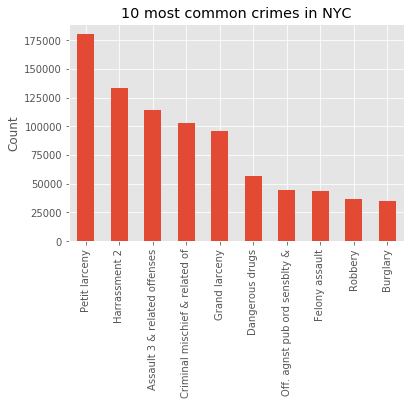

In [17]:
df['Description'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('10 most common crimes in NYC')
plt.show()

### Petit larceny Crimes by Borough IN 2015 (unstandardized - not considering the population)

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


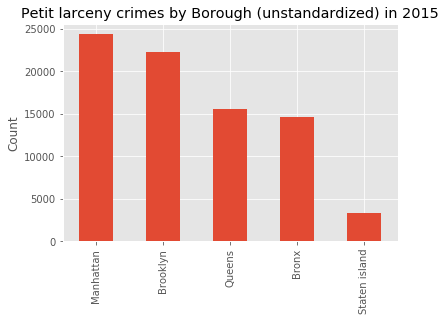

In [18]:
petit_Crime = df.copy()
petit_Crime = petit_Crime[petit_Crime['Description']=='Petit larceny']
petit_Crime.index = petit_Crime.index.year
petit_Crime = petit_Crime.ix[2015]
petit_Crime['Borough'].value_counts().plot.bar()

plt.ylabel('Count')
plt.title('Petit larceny crimes by Borough (unstandardized) in 2015') 
plt.show()

### Petit larceny Crimes by Borough IN 2015 (standardized - considering the population)

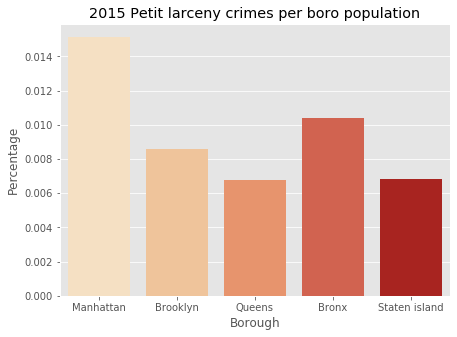

,Borough,Petit larceny,2015_population,crime_per_population
0,Manhattan,24397,1612077.0,0.015134
1,Brooklyn,22331,2600681.5,0.008587
2,Queens,15525,2290148.5,0.006779
3,Bronx,14678,1415948.0,0.010366
4,Staten island,3274,477942.5,0.006850


In [70]:
b = petit_Crime['Borough'].value_counts()
borough = pd.DataFrame(b).reset_index()
borough.columns=['Borough','Petit larceny']

#use linear interpolation to figure out population per boro in 2015
df_pop = nyc_pop.copy()
df_pop.drop(0,inplace=True)
df_pop['Borough'] = df_pop['Borough'].map(lambda x: x.upper())
df_pop = df_pop.transpose() #turn all values in 1st column into column headers
df_pop.reset_index(inplace=True)
df_pop[1] = df_pop[1].str.strip() #strip white space from first column header
df_pop[2] = df_pop[2].str.strip() #strip white space from second column header
df_pop[3] = df_pop[3].str.strip()
df_pop[4] = df_pop[4].str.strip()
df_pop[5] = df_pop[5].str.strip()
df_pop.columns = df_pop.iloc[0]    

df_pop.drop(0,axis=0, inplace=True) #drop row with index 0
df_pop = df_pop.rename(columns={'Borough':'Year'})
df_pop['Year'] = pd.to_datetime(df_pop['Year'], format='%Y')
df_pop.set_index('Year', inplace=True) #index the year column
df_pop = df_pop.resample('A').sum()  #create years in bewtween the decades provided
df_pop = df_pop.apply(lambda x: x.str.replace(',',''))
df_pop.replace(np.nan,0, inplace=True)
df_pop = df_pop.astype(int)

#merge dataframes population and crimes
borough_pop15 = df_pop.replace(0,np.nan).interpolate('linear')[65:66].transpose() #slice to get the 2015 only
borough_pop15.columns = ['2015']
borough_pop15.reset_index(inplace=True)
borough_pop15.columns = ['Borough', '2015_population']
borough_pop15['Borough']=borough_pop15['Borough'].str.capitalize()
borough_crimes = pd.merge(borough, borough_pop15, on='Borough',how='outer')

#calculate crime as percentage of population
borough_crimes['crime_per_population'] =  borough_crimes['Petit larceny'] / borough_crimes['2015_population']
plt.figure(figsize=(7,5))
sns.barplot(x='Borough', y='crime_per_population', data=borough_crimes,palette='OrRd')
plt.ylabel('Percentage')
plt.title('2015 Petit larceny crimes per boro population')
plt.show()
borough_crimes

### All NYC crimes reported by borough in 2012

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


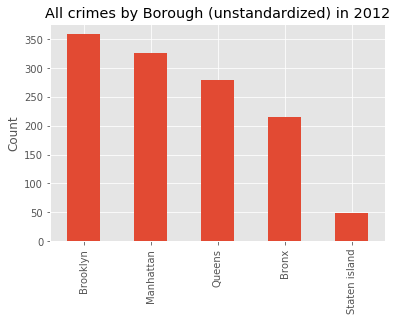

In [27]:
"""All NYC crimes reported by boro in 2012 (unstandardized)"""

All_crimes = df.copy()
All_crimes.index = All_crimes.index.year
All_crimes = All_crimes.ix[2012]
All_crimes['Borough'].value_counts().plot.bar()

plt.ylabel('Count')
plt.title('All crimes by Borough (unstandardized) in 2012')
plt.show()

### Crime Status Analysis

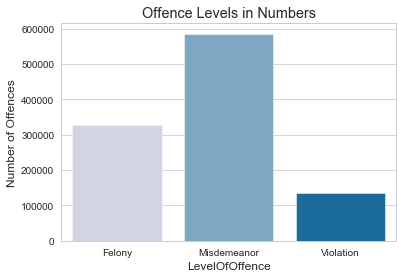

In [72]:
df2=nyc_crime.groupby(['LevelOfOffence'])['Complaint_No'].count().reset_index()
sns.set_style('whitegrid')
g=sns.barplot(x='LevelOfOffence',y='Complaint_No',data=df2,palette='PuBu');
#g=(g.set_axis_labels("Year","Number of Offences"))
plt.ylabel('Number of Offences');
plt.title("Offence Levels in Numbers");

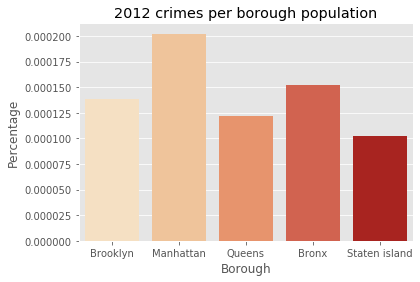

,Borough,Crimes,2012,crime_per_population
0,Brooklyn,359,2600681.5,0.000138
1,Manhattan,326,1612077.0,0.000202
2,Queens,279,2290148.5,0.000122
3,Bronx,216,1415948.0,0.000153
4,Staten island,49,477942.5,0.000103


In [69]:
"""All crimes by boro population in 2012 (standardized)"""

b1 = All_crimes['Borough'].value_counts()
borough1 = pd.DataFrame(b1).reset_index()
borough1.columns=['Borough','Crimes']

#use linear interpolation to figure out population per boro in 2015
df1_pop = nyc_pop.copy()
df1_pop.drop(0,inplace=True)
df1_pop['Borough'] = df1_pop['Borough'].map(lambda x: x.upper())
df1_pop = df1_pop.transpose() #turn all values in 1st column into column headers
df1_pop.reset_index(inplace=True)
df1_pop[1] = df1_pop[1].str.strip() #strip white space from first column header
df1_pop[2] = df1_pop[2].str.strip() #strip white space from second column header
df1_pop[3] = df1_pop[3].str.strip()
df1_pop[4] = df1_pop[4].str.strip()
df1_pop[5] = df1_pop[5].str.strip()
df1_pop.columns = df1_pop.iloc[0]     #turn index '0' with of boro names to column header

df1_pop.drop(0,axis=0, inplace=True) #drop row with index 0
df1_pop = df1_pop.rename(columns={'Borough':'Year'})
df1_pop['Year'] = pd.to_datetime(df1_pop['Year'], format='%Y')
df1_pop.set_index('Year', inplace=True) #index the year column
df1_pop = df1_pop.resample('A').sum()  #create years in bewtween the decades provided
df1_pop = df1_pop.apply(lambda x: x.str.replace(',',''))
df1_pop.replace(np.nan,0, inplace=True)
df1_pop = df1_pop.astype(int)

#merge dataframes
pop15 = df1_pop.replace(0,np.nan).interpolate('linear')[65:66].transpose() #slice to get the year 2015
pop15.columns = ['2012']
pop15.reset_index(inplace=True)
pop15.columns = ['Borough', '2012']
pop15['Borough']=pop15['Borough'].str.capitalize()
borough_crimes1 = pd.merge(borough1, pop15, on='Borough',how='outer')

#calculate crime as percentage of population
borough_crimes1['crime_per_population'] =  borough_crimes1['Crimes'] / borough_crimes1['2012']
sns.barplot(x='Borough', y='crime_per_population', data=borough_crimes1,palette='OrRd')
plt.ylabel('Percentage')
plt.title('2012 crimes per borough population')
plt.show()
borough_crimes1

Although from plot above, we see that Brooklyn has almsot 10% more crimes than the Manhattan in absolute numbers, when considering population size, we see that overall crimes in the Manhattan is almost 30% more pervasive than in Brooklyn.

## Staten Island remains the safest borough in NYC with the lowest crime rate

Total numnber of categories of each group in Staten Island

In [288]:
manh_crime =  nyc_crime[nyc_crime['Borough'] == 'Staten island']
manh_crime
dff= manh_crime.groupby(['Description'])['Complaint_No'].count()
dff

Description
Administrative code                       91
Agriculture & mrkts law-unclassified       6
Alcoholic beverage control law             1
Arson                                    125
Assault 3 & related offenses            4866
Burglar's tools                           18
Burglary                                1306
Criminal mischief & related of          6113
Criminal trespass                        265
Dangerous drugs                         1671
Dangerous weapons                        757
Disorderly conduct                         1
Endan welfare incomp                       1
Escape 3                                   1
Felony assault                          1471
Forgery                                  141
Frauds                                   624
Grand larceny                           2782
Grand larceny of motor vehicle           477
Harrassment 2                           9385
Homicide-negligent-vehicle                 1
Intoxicated & impaired driving          143

# Modelling
> Finding all the venues within a 1000 meter radius of each neighborhood in Staten Island.
> Perform one hot ecoding on the venues data.
> Grouping the venues by the neighborhood and calculating their mean.
> Performing a K-means clustering (Defining K = 5)

In [114]:
from geopy.geocoders import Nominatim
import json

Read data from New York City Dataset to find all the Neighborhoods

In [115]:

with open(r'C:\Users\aksha\Desktop\DataScience\newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [116]:
neighborhood = newyork_data['features']
neighborhood[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [117]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [118]:
for data in neighborhood:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                    'Neighborhood': neighborhood_name,
                                    'Latitude': neighborhood_lat,
                                    'Longitude': neighborhood_lon}, ignore_index=True)

In [119]:
neighborhoods.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [120]:
manh_df = neighborhoods
manh_df.drop(neighborhoods.index[manh_df['Borough'] == 'Bronx'], inplace = True)
manh_df.drop(neighborhoods.index[manh_df['Borough'] == 'Queens'], inplace = True)
manh_df.drop(neighborhoods.index[manh_df['Borough'] == 'Manhattan'], inplace = True)
manh_df.drop(neighborhoods.index[manh_df['Borough'] == 'Brooklyn'], inplace = True)

In [121]:
manh_df.head()

,Borough,Neighborhood,Latitude,Longitude
197,Staten Island,St. George,40.644982,-74.079353
198,Staten Island,New Brighton,40.640615,-74.087017
199,Staten Island,Stapleton,40.626928,-74.077902
200,Staten Island,Rosebank,40.615305,-74.069805
201,Staten Island,West Brighton,40.631879,-74.107182


In [111]:
address = 'New York City, United States of America'

geolocator = Nominatim(user_agent="nyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [98]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#4444cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [126]:
address1 = 'Staten Island, New York'

geolocator1 = Nominatim(user_agent="nyc_explorer")
location1 = geolocator.geocode(address)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


### Map of Staten Island with all the Neighborhoods

In [124]:
map_si = folium.Map(location=[latitude1, longitude1], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(manh_df['Latitude'], manh_df['Longitude'], manh_df['Borough'], manh_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_si)  
    
map_si

### Utilize the Foursquare API in order to explore the neighborhoods and segment them

In [139]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude1, 
    longitude1, 
    1500, 
    100)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=WBY04DIJNKCX1TSTMTTZ3OWGYJXXZVUT4NBYOXXYSC4QRZ03&client_secret=L2TZNT23P5NIYRIOP32GY4NGZX23TBE5R2VXNWEEUUYCCYZK&v=20180604&ll=40.5834557,-74.1496048&radius=1500&limit=100'

In [140]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0b8a518a993d2972793834'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 63,
  'suggestedBounds': {'ne': {'lat': 40.596955713500016,
    'lng': -74.13186216466625},
   'sw': {'lat': 40.56995568649999, 'lng': -74.16734743533377}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4be06d0198f2a593ce34c25a',
       'name': 'Greenbelt Nature Center',
       'location': {'address': '501 Brielle Ave',
        'crossStreet': 'Rockland Ave',
        'lat': 40.586615957446355,
        'lng': -

Find Top venues in and around Staten Island

In [133]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [148]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Greenbelt Nature Center,Trail,40.586616,-74.146917
1,La Tourette Golf Course,Golf Course,40.575603,-74.147487
2,Primark,Clothing Store,40.580279,-74.166153
3,Disney store,Toy / Game Store,40.581963,-74.166272
4,Panera Bread,Bakery,40.577944,-74.164274
5,Bath & Body Works,Cosmetics Shop,40.582460,-74.165753
6,Massage Envy - Staten Island,Spa,40.578285,-74.163982
7,The Container Store,Furniture / Home Store,40.579467,-74.166181
8,Jacques Marchais Museum of Tibetan Art,Art Museum,40.576315,-74.138113
9,The Lego Store,Toy / Game Store,40.581899,-74.165907


In [142]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

63 venues were returned by Foursquare.


In [147]:
map_SI = folium.Map(location=[latitude1, longitude1], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['categories']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_SI)  
    
map_SI

## Explore Neighborhoods in Staten Island

In [149]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [150]:
staten_venues = getNearbyVenues(names=manh_df['Neighborhood'],
                                   latitudes=manh_df['Latitude'],
                                   longitudes=manh_df['Longitude']
                                  )

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [151]:
staten_venues.shape

(814, 7)

In [152]:
staten_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
1,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
2,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
3,St. George,40.644982,-74.079353,Shake Shack,40.643660,-74.075891,Burger Joint
4,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
5,St. George,40.644982,-74.079353,St. George Theatre,40.642253,-74.077496,Theater
6,St. George,40.644982,-74.079353,Marie's 2,40.642176,-74.076669,Italian Restaurant
7,St. George,40.644982,-74.079353,Ruddy & Dean,40.644074,-74.076683,Bar
8,St. George,40.644982,-74.079353,Columbia Factory Store,40.645342,-74.076687,Clothing Store
9,St. George,40.644982,-74.079353,The Gavel Grill,40.642157,-74.076674,American Restaurant


In [153]:
staten_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annadale,12,12,12,12,12,12
Arden Heights,4,4,4,4,4,4
Arlington,5,5,5,5,5,5
Arrochar,22,22,22,22,22,22
Bay Terrace,11,11,11,11,11,11
Bloomfield,4,4,4,4,4,4
Bulls Head,30,30,30,30,30,30
Butler Manor,6,6,6,6,6,6
Castleton Corners,16,16,16,16,16,16


## Analyze each neighborhood

In [154]:
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
staten_onehot['Neighborhood'] = staten_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]

staten_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,St. George,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
staten_grouped = staten_onehot.groupby('Neighborhood').mean().reset_index()
staten_grouped.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Yoga Studio
0,Annadale,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arden Heights,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arlington,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arrochar,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bay Terrace,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Each Neighborhood with Top 5 venues

In [157]:
num_top_venues = 5

for hood in staten_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = staten_grouped[staten_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annadale----
                 venue  freq
0          Pizza Place  0.17
1        Deli / Bodega  0.08
2                Diner  0.08
3  American Restaurant  0.08
4           Restaurant  0.08


----Arden Heights----
               venue  freq
0        Pizza Place  0.25
1        Coffee Shop  0.25
2           Bus Stop  0.25
3           Pharmacy  0.25
4  Accessories Store  0.00


----Arlington----
                 venue  freq
0             Bus Stop   0.4
1        Deli / Bodega   0.2
2  American Restaurant   0.2
3          Coffee Shop   0.2
4           Playground   0.0


----Arrochar----
                venue  freq
0       Deli / Bodega  0.09
1        Liquor Store  0.09
2         Pizza Place  0.09
3            Bus Stop  0.09
4  Italian Restaurant  0.09


----Bay Terrace----
                venue  freq
0         Supermarket  0.18
1  Italian Restaurant  0.18
2    Sushi Restaurant  0.09
3  Salon / Barbershop  0.09
4          Donut Shop  0.09


----Bloomfield----
               venue  freq
0  R

In [158]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [265]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = staten_grouped['Neighborhood']

for ind in np.arange(staten_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Liquor Store,Train Station,Cosmetics Shop,Sushi Restaurant,Park,Diner,Food,American Restaurant,Deli / Bodega
1,Arden Heights,Pharmacy,Coffee Shop,Bus Stop,Pizza Place,Eastern European Restaurant,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
2,Arlington,Bus Stop,Deli / Bodega,American Restaurant,Coffee Shop,Event Space,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
3,Arrochar,Deli / Bodega,Liquor Store,Pizza Place,Bus Stop,Italian Restaurant,Sandwich Place,Outdoors & Recreation,Nail Salon,Food Truck,Polish Restaurant
4,Bay Terrace,Supermarket,Italian Restaurant,Insurance Office,Playground,Sushi Restaurant,Donut Shop,Salon / Barbershop,Shipping Store,Home Service,Dessert Shop


## Cluster Neighborhoods

In [246]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

In [266]:
kclusters = 5

staten_grouped_clustering = staten_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 4, 4, 3, 3, 0, 3, 3, 3, 3])

In [267]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

staten_merged = manh_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
staten_merged = staten_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
staten_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
197,Staten Island,St. George,40.644982,-74.079353,3.0,Clothing Store,Bar,Sporting Goods Shop,Italian Restaurant,Burger Joint,Baseball Stadium,Steakhouse,Pizza Place,Monument / Landmark,Coffee Shop
198,Staten Island,New Brighton,40.640615,-74.087017,4.0,Bus Stop,Deli / Bodega,Park,Discount Store,Playground,Bowling Alley,Diner,Farmers Market,Food,Flower Shop
199,Staten Island,Stapleton,40.626928,-74.077902,3.0,Discount Store,Pizza Place,Sandwich Place,Bank,Deli / Bodega,Residential Building (Apartment / Condo),Fast Food Restaurant,Café,Spanish Restaurant,Pharmacy
200,Staten Island,Rosebank,40.615305,-74.069805,3.0,Italian Restaurant,Grocery Store,Mexican Restaurant,Bagel Shop,Breakfast Spot,Storage Facility,Supermarket,Pizza Place,Cajun / Creole Restaurant,Beach
201,Staten Island,West Brighton,40.631879,-74.107182,3.0,Coffee Shop,Pharmacy,Music Store,Italian Restaurant,Bank,Bar,Mexican Restaurant,Café,Burger Joint,Sandwich Place
202,Staten Island,Grymes Hill,40.624185,-74.087248,0.0,Deli / Bodega,Dog Run,Yoga Studio,Event Space,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
203,Staten Island,Todt Hill,40.597069,-74.111329,0.0,Trail,Park,Yoga Studio,Eastern European Restaurant,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
204,Staten Island,South Beach,40.580247,-74.079553,3.0,Beach,Pier,Deli / Bodega,Athletics & Sports,Event Space,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant
205,Staten Island,Port Richmond,40.633669,-74.129434,4.0,Bus Stop,Rental Car Location,Pizza Place,Bar,Donut Shop,Martial Arts Dojo,Discount Store,Diner,Food,Flower Shop
206,Staten Island,Mariner's Harbor,40.632546,-74.150085,3.0,Deli / Bodega,Italian Restaurant,Supermarket,Athletics & Sports,Yoga Studio,Event Space,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant


In [268]:
staten_merged = staten_merged.drop(257, axis=0)

In [254]:
staten_merged

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,
St. George,Staten Island,40.644982,-74.079353,3.0,Clothing Store,Bar,Sporting Goods Shop,Italian Restaurant,Burger Joint,Baseball Stadium,Steakhouse,Pizza Place,Monument / Landmark,Coffee Shop
New Brighton,Staten Island,40.640615,-74.087017,4.0,Bus Stop,Deli / Bodega,Park,Discount Store,Playground,Bowling Alley,Diner,Farmers Market,Food,Flower Shop
Stapleton,Staten Island,40.626928,-74.077902,3.0,Discount Store,Pizza Place,Sandwich Place,Bank,Deli / Bodega,Residential Building (Apartment / Condo),Fast Food Restaurant,Café,Spanish Restaurant,Pharmacy
Rosebank,Staten Island,40.615305,-74.069805,3.0,Italian Restaurant,Grocery Store,Mexican Restaurant,Bagel Shop,Breakfast Spot,Storage Facility,Supermarket,Pizza Place,Cajun / Creole Restaurant,Beach
West Brighton,Staten Island,40.631879,-74.107182,3.0,Coffee Shop,Pharmacy,Music Store,Italian Restaurant,Bank,Bar,Mexican Restaurant,Café,Burger Joint,Sandwich Place
Grymes Hill,Staten Island,40.624185,-74.087248,0.0,Deli / Bodega,Dog Run,Yoga Studio,Event Space,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
Todt Hill,Staten Island,40.597069,-74.111329,0.0,Trail,Park,Yoga Studio,Eastern European Restaurant,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
South Beach,Staten Island,40.580247,-74.079553,3.0,Beach,Pier,Deli / Bodega,Athletics & Sports,Event Space,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant
Port Richmond,Staten Island,40.633669,-74.129434,4.0,Bus Stop,Rental Car Location,Pizza Place,Bar,Donut Shop,Martial Arts Dojo,Discount Store,Diner,Food,Flower Shop


In [269]:
staten_merged['Cluster Labels'] = staten_merged['Cluster Labels'].astype(int)

In [270]:
staten_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
197,Staten Island,St. George,40.644982,-74.079353,3,Clothing Store,Bar,Sporting Goods Shop,Italian Restaurant,Burger Joint,Baseball Stadium,Steakhouse,Pizza Place,Monument / Landmark,Coffee Shop
198,Staten Island,New Brighton,40.640615,-74.087017,4,Bus Stop,Deli / Bodega,Park,Discount Store,Playground,Bowling Alley,Diner,Farmers Market,Food,Flower Shop
199,Staten Island,Stapleton,40.626928,-74.077902,3,Discount Store,Pizza Place,Sandwich Place,Bank,Deli / Bodega,Residential Building (Apartment / Condo),Fast Food Restaurant,Café,Spanish Restaurant,Pharmacy
200,Staten Island,Rosebank,40.615305,-74.069805,3,Italian Restaurant,Grocery Store,Mexican Restaurant,Bagel Shop,Breakfast Spot,Storage Facility,Supermarket,Pizza Place,Cajun / Creole Restaurant,Beach
201,Staten Island,West Brighton,40.631879,-74.107182,3,Coffee Shop,Pharmacy,Music Store,Italian Restaurant,Bank,Bar,Mexican Restaurant,Café,Burger Joint,Sandwich Place
202,Staten Island,Grymes Hill,40.624185,-74.087248,0,Deli / Bodega,Dog Run,Yoga Studio,Event Space,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
203,Staten Island,Todt Hill,40.597069,-74.111329,0,Trail,Park,Yoga Studio,Eastern European Restaurant,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
204,Staten Island,South Beach,40.580247,-74.079553,3,Beach,Pier,Deli / Bodega,Athletics & Sports,Event Space,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant
205,Staten Island,Port Richmond,40.633669,-74.129434,4,Bus Stop,Rental Car Location,Pizza Place,Bar,Donut Shop,Martial Arts Dojo,Discount Store,Diner,Food,Flower Shop
206,Staten Island,Mariner's Harbor,40.632546,-74.150085,3,Deli / Bodega,Italian Restaurant,Supermarket,Athletics & Sports,Yoga Studio,Event Space,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant


In [275]:
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged['Latitude'], staten_merged['Longitude'], staten_merged['Neighborhood'], staten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [276]:
staten_merged.loc[staten_merged['Cluster Labels'] == 0, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
202,Grymes Hill,Deli / Bodega,Dog Run,Yoga Studio,Event Space,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
203,Todt Hill,Trail,Park,Yoga Studio,Eastern European Restaurant,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
219,Silver Lake,American Restaurant,Burger Joint,Golf Course,Yoga Studio,Event Space,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
245,Bloomfield,Recreation Center,Bus Stop,Burger Joint,Theme Park,Department Store,Dessert Shop,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Dance Studio
284,Manor Heights,Deli / Bodega,Donut Shop,Liquor Store,American Restaurant,Home Service,Dog Run,Chinese Restaurant,Campground,Pharmacy,Yoga Studio


In [277]:
staten_merged.loc[staten_merged['Cluster Labels'] == 1, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
226,Graniteville,Grocery Store,Yoga Studio,Food Truck,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [278]:
staten_merged.loc[staten_merged['Cluster Labels'] == 2, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
207,Port Ivory,Bar,Yoga Studio,Event Space,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market


In [279]:
staten_merged.loc[staten_merged['Cluster Labels'] == 3, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
197,St. George,Clothing Store,Bar,Sporting Goods Shop,Italian Restaurant,Burger Joint,Baseball Stadium,Steakhouse,Pizza Place,Monument / Landmark,Coffee Shop
199,Stapleton,Discount Store,Pizza Place,Sandwich Place,Bank,Deli / Bodega,Residential Building (Apartment / Condo),Fast Food Restaurant,Café,Spanish Restaurant,Pharmacy
200,Rosebank,Italian Restaurant,Grocery Store,Mexican Restaurant,Bagel Shop,Breakfast Spot,Storage Facility,Supermarket,Pizza Place,Cajun / Creole Restaurant,Beach
201,West Brighton,Coffee Shop,Pharmacy,Music Store,Italian Restaurant,Bank,Bar,Mexican Restaurant,Café,Burger Joint,Sandwich Place
204,South Beach,Beach,Pier,Deli / Bodega,Athletics & Sports,Event Space,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant
206,Mariner's Harbor,Deli / Bodega,Italian Restaurant,Supermarket,Athletics & Sports,Yoga Studio,Event Space,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant
208,Castleton Corners,Pizza Place,Bank,Ice Cream Shop,Bagel Shop,Deli / Bodega,Mini Golf,Go Kart Track,Tattoo Parlor,Grocery Store,Burger Joint
209,New Springville,Deli / Bodega,Pizza Place,Coffee Shop,Liquor Store,Pharmacy,Restaurant,Chinese Restaurant,Donut Shop,Sandwich Place,Optical Shop
210,Travis,Hotel,Gym,Deli / Bodega,Bowling Alley,Spanish Restaurant,Baseball Field,Café,Sports Club,Park,Comedy Club
211,New Dorp,Italian Restaurant,Pizza Place,Coffee Shop,Taco Place,Ice Cream Shop,Indian Restaurant,Gas Station,Mexican Restaurant,Food & Drink Shop,Dim Sum Restaurant


In [280]:
staten_merged.loc[staten_merged['Cluster Labels'] == 4, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
198,New Brighton,Bus Stop,Deli / Bodega,Park,Discount Store,Playground,Bowling Alley,Diner,Farmers Market,Food,Flower Shop
205,Port Richmond,Bus Stop,Rental Car Location,Pizza Place,Bar,Donut Shop,Martial Arts Dojo,Discount Store,Diner,Food,Flower Shop
224,Park Hill,Bus Stop,Athletics & Sports,Gym / Fitness Center,Hotel,Coffee Shop,Park,Event Space,Flower Shop,Fish & Chips Shop,Filipino Restaurant
225,Westerleigh,Convenience Store,Boarding House,Arcade,Bus Stop,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant
227,Arlington,Bus Stop,Deli / Bodega,American Restaurant,Coffee Shop,Event Space,Food,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
229,Grasmere,Bus Stop,Home Service,Grocery Store,Bagel Shop,Bank,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Nail Salon,Park
241,Arden Heights,Pharmacy,Coffee Shop,Bus Stop,Pizza Place,Eastern European Restaurant,Flower Shop,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
256,Randall Manor,Home Service,Bus Stop,Playground,Bagel Shop,Park,Yoga Studio,Event Space,Flower Shop,Fish & Chips Shop,Filipino Restaurant
285,Willowbrook,Bus Stop,Chinese Restaurant,IT Services,Pizza Place,Bagel Shop,Deli / Bodega,Intersection,Discount Store,Dog Run,Food


#### 5 Clusters are created. We can define characteristics for each group, matching them with the people's interest and help them find the safe and happy place to move in in Staten Island